In [25]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib
from windrose import WindroseAxes
import seaborn as sns

In [2]:
# netCDF files
fn1='C:\\Users\\odemeo\\Documents\\Field_Data_Processing\\CACO_MET\\HoM\\1125C\\1125Cwxt-a.nc'
fn2='C:\\Users\\odemeo\\Documents\\Field_Data_Processing\\CACO_MET\\HoM\\1125D\\1125Dwxt-a.nc'
fn3='C:\\Users\\odemeo\\Documents\\Field_Data_Processing\\CACO_MET\\HoM\\1125E\\1125Ewxt-a.nc'

In [3]:
# Read in mooring 1125
ds_1125C=xr.open_dataset(fn1)
ds_1125D=xr.open_dataset(fn2)
ds_1125E=xr.open_dataset(fn3)

# Make statistics table
df_1125C=ds_1125C.to_dataframe()
df_1125C.describe()

,WD_min,WD_410,WD_gust,WS_min,WS_401,WG_402,T_21,RH_910
count,129401.000000,129401.000000,129401.000000,129401.000000,129401.000000,129401.000000,129401.000000,129401.000000
mean,160.599030,194.486664,215.826370,2.676881,5.195739,7.444385,13.065053,73.474068
std,96.262390,92.568794,90.975151,2.228861,2.709988,3.626051,5.779075,15.322215
min,0.380000,0.380000,3.380000,0.000000,0.000000,0.000000,-0.300000,18.799999
25%,77.379997,120.379997,156.380005,1.100000,3.300000,4.700000,8.300000,64.000000
50%,174.380005,213.380005,242.380005,2.200000,4.900000,7.200000,12.800000,76.300003
75%,195.380005,246.380005,270.380005,3.600000,6.600000,9.600000,17.200001,86.199997
max,359.380005,359.380005,345.380005,17.500000,21.799999,26.900000,30.000000,94.400002


In [4]:
# Make statistics table
df_1125D=ds_1125D.to_dataframe()
df_1125D.describe()

,WD_min,WD_410,WD_gust,WS_min,WS_401,WG_402,T_21,RH_910
count,122594.000000,122594.000000,122594.000000,122594.000000,122594.000000,122594.000000,122594.000000,122594.000000
mean,135.646713,186.475616,216.205231,2.371266,4.099445,5.886937,20.863037,86.168373
std,78.654015,91.555046,92.581604,1.723976,2.263441,3.041321,2.998218,11.434930
min,5.400000,0.399994,0.399994,0.000000,0.000000,0.000000,12.300000,40.299999
25%,51.400002,108.400002,159.649994,1.200000,2.500000,3.600000,18.799999,78.099998
50%,167.399994,211.399994,243.399994,2.100000,3.800000,5.600000,20.700001,88.300003
75%,194.399994,235.399994,270.399994,3.100000,5.200000,7.600000,22.700001,96.000000
max,356.399994,359.399994,359.399994,16.200001,21.600000,27.900000,31.400000,100.000000


In [5]:
# Make statistics table
df_1125E=ds_1125E.to_dataframe()
df_1125E.describe()

,WD_min,WD_410,WD_gust,WS_min,WS_401,WG_402,T_21,RH_910
count,120846.000000,120846.000000,120846.000000,120846.000000,120846.000000,120846.000000,120846.000000,120846.000000
mean,149.116592,201.070526,227.031250,2.768572,5.195168,7.754325,11.438555,74.588402
std,90.051559,101.131660,107.292061,2.548749,3.307254,4.490474,5.454727,16.396263
min,5.420000,0.420013,0.420013,0.000000,0.000000,0.000000,-1.400000,25.100000
25%,54.419998,132.419998,169.419998,1.200000,3.000000,4.600000,7.100000,61.000000
50%,171.419998,222.419998,250.419998,2.100000,4.700000,7.400000,11.700000,74.800003
75%,220.419998,275.420013,313.420013,3.500000,6.600000,10.100000,15.800000,89.699997
max,345.420013,359.420013,359.420013,24.700001,31.299999,40.000000,26.200001,100.000000


In [6]:
# Pull out variables
time1125=np.concatenate((ds_1125C['time'].values,ds_1125D['time'].values,ds_1125E['time'].values))
wdir_min1125=np.concatenate((ds_1125C['WD_min'].values,ds_1125D['WD_min'].values,ds_1125E['WD_min'].values))
wdir_mean1125=np.concatenate((ds_1125C['WD_410'].values,ds_1125D['WD_410'].values,ds_1125E['WD_410'].values))
wdir_max1125=np.concatenate((ds_1125C['WD_gust'].values,ds_1125D['WD_gust'].values,ds_1125E['WD_gust'].values))
wsp_min1125=np.concatenate((ds_1125C['WS_min'].values,ds_1125D['WS_min'].values,ds_1125E['WS_min'].values))
wsp_mean1125=np.concatenate((ds_1125C['WS_401'].values,ds_1125D['WS_401'].values,ds_1125E['WS_401'].values))
wsp_max1125=np.concatenate((ds_1125C['WG_402'].values,ds_1125D['WG_402'].values,ds_1125E['WG_402'].values))
temp1125=np.concatenate((ds_1125C['T_21'].values,ds_1125D['T_21'].values,ds_1125E['T_21'].values))
relh1125=np.concatenate((ds_1125C['RH_910'].values,ds_1125D['RH_910'].values,ds_1125E['RH_910'].values))

# Get rid of bad rows
nans=np.argwhere(np.isnan(wdir_min1125)) # Find rows of NaNs

time1125=np.delete(time1125,nans)
wdir_min1125=np.delete(wdir_min1125,nans)
wdir_mean1125=np.delete(wdir_mean1125,nans)
wdir_max1125=np.delete(wdir_max1125,nans)
wsp_min1125=np.delete(wsp_min1125,nans)
wsp_mean1125=np.delete(wsp_mean1125,nans)
wsp_max1125=np.delete(wsp_max1125,nans)
temp1125=np.delete(temp1125,nans)
relh1125=np.delete(relh1125,nans)

In [ ]:
# 1125 Time-series plots
fig, ax=plt.subplots(nrows=4, ncols=1, sharey=False, sharex=True, squeeze=True, figsize = (12,12))

# Wind speed
ax[0].plot(time1125,wsp_max1125, '.',zorder=1,label='Max')
ax[0].plot(time1125,wsp_mean1125,'-',linewidth=2,zorder=2,label='Mean')
ax[0].plot(time1125,wsp_min1125, '.',zorder=0,label='Min')
ax[0].set_ylabel('Wind speed (m/s)',fontsize=14)
ax[0].legend()
ax[0].title.set_text('1125')
fig.autofmt_xdate() # Rotate x-axis labels so you can read all of them
#ax[0].text(.02,.85,'Wind speed',fontsize=16,transform=ax[0].transAxes)

# Wind direction
ax[1].plot(time1125,wdir_mean1125,'m.',linewidth=2)
ax[1].set_yticks([0.,90.,180.,270,360])
ax[1].set_ylabel('Wind direction ($^{\circ}$T)',fontsize=14)
ax[1].grid(axis = 'y')
#ax[1].text(.02,.85,'Wind direction (from)',fontsize=16,transform=ax[1].transAxes)

# Temp
ax[2].plot(time1125,temp1125,'r-',linewidth=2)
ax[2].set_ylabel('Air temp. ($^{\circ}$C)',fontsize=14)
#ax[2].text(.02,.1,'Air temperature',fontsize=16,transform=ax[2].transAxes)

# Relative humidity
ax[3].plot(time1125,relh1125,'c-',linewidth=2)
ax[3].set_ylabel('Rel. humidity (%)',fontsize=14);
#ax[3].text(.02,.1,'Relative humidity',fontsize=16,transform=ax[4].transAxes)


In [ ]:
# 1125 Wind rose plot

# Mean wind dir/sp
ax=WindroseAxes.from_ax()
ax.bar(wdir_mean1125, wsp_mean1125, normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc=4)
plt.title('Mean wind speed/direction')
ax.set_yticks(np.arange(5, 20, step=5))
ax.set_yticklabels(np.arange(5, 20, step=5))
# ax.set_xticklabels((90, 45, 0, 315, 270, 225, 180, 135)) # Add this line bc there is an error in windrose axes
ax.set_xticklabels(['E', 'NE','N', 'NW', 'W', 'SW', 'S', 'SE']); # Add this line bc there is an error in windrose axes

# Gust wind dir/sp
ax=WindroseAxes.from_ax()
ax.bar(wdir_max1125, wsp_max1125, normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc=4)
plt.title('Gust wind speed/direction')
ax.set_yticks(np.arange(5, 20, step=5))
ax.set_yticklabels(np.arange(5, 20, step=5))
#ax.set_xticklabels((90, 45, 0, 315, 270, 225, 180, 135)) # Add this line bc there is an error in windrose axes
ax.set_xticklabels(['E', 'NE','N', 'NW', 'W', 'SW', 'S', 'SE']); # Add this line bc there is an error in windrose axes

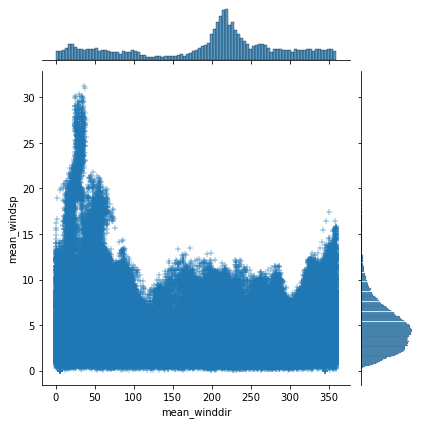

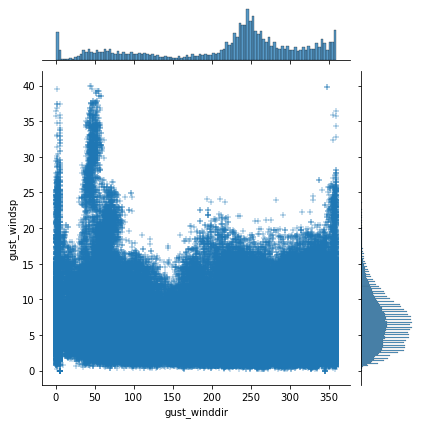

In [11]:
# Compute joint-probability

# Mean wind dir/sp
df_wind_mean=pd.DataFrame({'mean_windsp': wsp_mean1125, 'mean_winddir': wdir_mean1125})
sns.jointplot(data=df_wind_mean, x="mean_winddir", y="mean_windsp",marker="+")

# Gust wind dir/sp
df_wind_gust=pd.DataFrame({'gust_windsp': wsp_max1125, 'gust_winddir': wdir_max1125})
sns.jointplot(data=df_wind_gust, x="gust_winddir", y="gust_windsp",marker="+")

# H, xedges, yedges=np.histogram2d(wdir_mean1125, wsp_mean1125, bins=10)
# print(len(H))
# print(xedges)
# print(yedges)

In [26]:
def stick_plot(time, u, v, **kw):
    width = kw.pop('width', 0.002)
    headwidth = kw.pop('headwidth', 0)
    headlength = kw.pop('headlength', 0)
    headaxislength = kw.pop('headaxislength', 0)
    angles = kw.pop('angles', 'uv')
    ax = kw.pop('ax', None)
    
    if angles != 'uv':
        raise AssertionError("Stickplot angles must be 'uv' so that"
                             "if *U*==*V* the angle of the arrow on"
                             "the plot is 45 degrees CCW from the *x*-axis.")

    time, u, v = map(np.asanyarray, (time, u, v))
    if not ax:
        fig, ax = plt.subplots()
    
    q = ax.quiver(date2num(time), [[0]*len(time)], u, v,
                  angles='uv', width=width, headwidth=headwidth,
                  headlength=headlength, headaxislength=headaxislength,
                  **kw)

    ax.axes.get_yaxis().set_visible(False)
    ax.xaxis_date()
    return q

Text(0.5, 1.0, 'Gust wind')

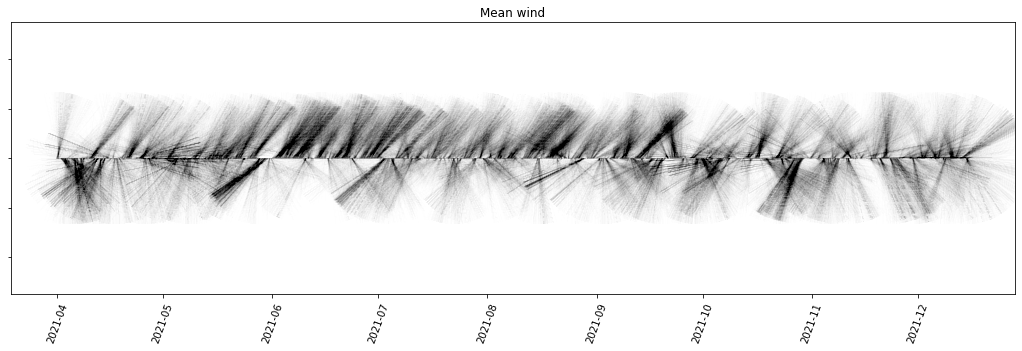

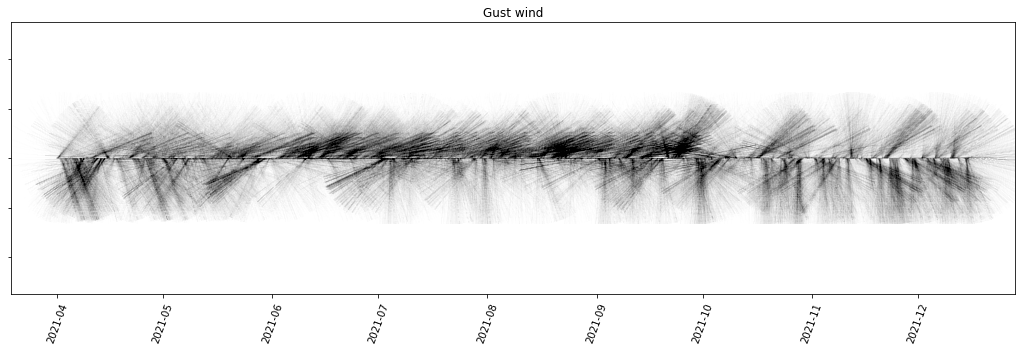

In [67]:
# Stick plots

# Calculate wind components from speed and metereological wind direction (wind from direction)
u_mean = -wsp_mean1125 * np.sin(np.radians(wdir_mean1125))
v_mean = -wsp_mean1125 * np.cos(np.radians(wdir_mean1125))

props = {'units' : "dots",
    'width' : 0.001,
    'headwidth': 0,
    'headlength': 0,
    'headaxislength': 0,
    'scale' : .08
        }
fig, ax = plt.subplots(figsize=(18, 5))
qiv = ax.quiver(time1125, [[0]*len(time1125)] , u_mean, v_mean, angles='uv', **props)
plt.xticks(rotation=70)
plt.setp(ax.get_yticklabels(), visible=False)
plt.title('Mean wind')

# Calculate wind components from speed and metereological wind direction (wind from direction)
u_max = -wsp_max1125 * np.sin(np.radians(wdir_max1125))
v_max = -wsp_max1125 * np.cos(np.radians(wdir_max1125))

props = {'units' : "dots",
    'width' : 0.001,
    'headwidth': 0,
    'headlength': 0,
    'headaxislength': 0,
    'scale' : .08
        }
fig, ax = plt.subplots(figsize=(18, 5))
qiv = ax.quiver(time1125, [[0]*len(time1125)] , u_max, v_max, angles='uv', **props)
plt.xticks(rotation=70)
plt.setp(ax.get_yticklabels(), visible=False)
plt.title('Gust wind');